In [1]:
import pandas as pd
import psycopg2
from sqlalchemy import create_engine
from pyspark.sql import SparkSession
# Database connection parameters
db_host = 'database-1.cxoaueie6ybk.us-east-2.rds.amazonaws.com'
db_port = 5432  # Default PostgreSQL port is 5432
db_name = 'postgres'
db_user = 'root'
db_password = 'irODJyh3LQpE0V3OcE3o'

# Create an engine to connect to the database
engine = create_engine(f'postgresql+psycopg2://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}')

# Establish a connection to the database
conn = psycopg2.connect(
    host=db_host,
    port=db_port,
    dbname=db_name,
    user=db_user,
    password=db_password
)
# SQL query to fetch data
query = 'SELECT * FROM darwin'

# Load data into a DataFrame
df = pd.read_sql(query, con = conn)

df

/tmp/ipykernel_36744/1125145934.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, con = conn)


,route_id,unique_id,service_start_date,update_origin,train_platform,working_time_pass,working_time_arrival,working_time_departure,planned_time_arrival,planned_time_departure,...,platform,train_length,estimated_time,source,actual_time,actual_time_class,is_delayed_arrival,is_delayed_departure,source_instance,estimated_time_minutes
0,202407038081744,P81744,2024-07-03,TD,CCRT,None,23:17:00,23:17:30,23:17:00,23:17:00,...,2,NaN,None,None,None,None,False,False,None,None
1,202407038097422,P97422,2024-07-03,TD,ALBNYPK,None,23:14:00,23:14:30,23:14:00,23:14:00,...,2,8.0,None,None,None,None,False,False,None,None
2,202407038097422,P97422,2024-07-03,TD,BEXLEY,None,23:16:30,23:17:30,23:17:00,23:17:00,...,2,8.0,None,None,None,None,False,False,None,None
3,202407037143658,G43658,2024-07-03,TD,SHAL341,None,23:29:00,23:32:00,None,None,...,None,NaN,None,None,None,None,False,False,None,None
4,202407037143658,G43658,2024-07-03,TD,SHALFD,None,23:34:00,23:35:30,None,None,...,None,NaN,None,None,None,None,False,False,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344340,202407097149501,G49501,2024-07-09,TD,STALBCS,None,21:26:00,21:34:00,None,None,...,None,8.0,None,None,None,None,False,False,None,None
344341,202407096778624,C78624,2024-07-09,TD,BSCTSTA,None,20:11:00,20:11:30,20:11:00,20:11:00,...,1,NaN,None,None,None,None,False,False,None,None
344342,202407097640600,L40600,2024-07-09,TD,CREWE,None,20:26:00,20:31:00,20:27:00,20:31:00,...,6,NaN,None,None,None,None,False,False,None,None
344343,202407097643425,L43425,2024-07-09,TD,ROGRSTN,None,20:10:30,20:11:30,20:11:00,20:11:00,...,1,NaN,None,None,None,None,False,False,None,None


In [2]:
#getting an overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344345 entries, 0 to 344344
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   route_id                344345 non-null  object 
 1   unique_id               344345 non-null  object 
 2   service_start_date      344345 non-null  object 
 3   update_origin           335162 non-null  object 
 4   train_platform          344345 non-null  object 
 5   working_time_pass       0 non-null       object 
 6   working_time_arrival    344345 non-null  object 
 7   working_time_departure  344345 non-null  object 
 8   planned_time_arrival    312364 non-null  object 
 9   planned_time_departure  311211 non-null  object 
 10  actual_arrival_time     286330 non-null  object 
 11  actual_departure_time   318282 non-null  object 
 12  platform                323536 non-null  object 
 13  train_length            123944 non-null  float64
 14  estimated_time      

In [3]:
#dropping null columns and showing new dataframe overview
df = df.drop(['working_time_pass','estimated_time','source','actual_time','actual_time_class','source_instance','estimated_time_minutes','working_time_arrival','working_time_departure'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344345 entries, 0 to 344344
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   route_id                344345 non-null  object 
 1   unique_id               344345 non-null  object 
 2   service_start_date      344345 non-null  object 
 3   update_origin           335162 non-null  object 
 4   train_platform          344345 non-null  object 
 5   planned_time_arrival    312364 non-null  object 
 6   planned_time_departure  311211 non-null  object 
 7   actual_arrival_time     286330 non-null  object 
 8   actual_departure_time   318282 non-null  object 
 9   platform                323536 non-null  object 
 10  train_length            123944 non-null  float64
 11  is_delayed_arrival      344345 non-null  bool   
 12  is_delayed_departure    344345 non-null  bool   
dtypes: bool(2), float64(1), object(10)
memory usage: 29.6+ MB


In [4]:
#checking duplicates
df.duplicated().sum()

13412

In [5]:
#dropping duplicates
df = df.drop_duplicates()
df.duplicated().sum()

0

In [6]:
#taking in rail reference csv to extract information about the stations routes are interacting with
df2 = pd.read_csv("./Data/RailReferences.csv")
df2.head()

,AtcoCode,TiplocCode,CrsCode,StationName,StationNameLang,GridType,Easting,Northing,CreationDateTime,ModificationDateTime,RevisionNumber,Modification
0,9100PENZNCE,PENZNCE,PNZ,Penzance Rail Station,NaN,U,147588,30599,2003-11-04T00:00:00,2011-09-30T14:47:28,2,rev
1,9100STIVES,STIVES,SIV,St Ives (Cornwall) Rail Station,NaN,U,151947,40127,2005-04-04T00:00:00,2011-09-30T14:47:28,4,rev
2,9100CARBISB,CARBISB,CBB,Carbis Bay Rail Station,NaN,U,152930,38745,2003-11-04T00:00:00,2011-09-30T14:47:28,5,rev
3,9100STERTH,STERTH,SER,St Erth Rail Station,NaN,U,154150,35730,2003-11-04T00:00:00,2007-02-13T17:06:21,3,rev
4,9100LELANTS,LELANTS,LTS,Lelant Saltings Rail Station,NaN,U,154430,36640,2003-11-04T00:00:00,2011-09-30T14:47:28,2,rev


In [7]:
#dropping information about the rail stations that we do not need
df2 = df2.drop(["StationNameLang","GridType","AtcoCode","Modification","CreationDateTime","ModificationDateTime","RevisionNumber","CrsCode"],axis=1)
df2

,TiplocCode,StationName,Easting,Northing
0,PENZNCE,Penzance Rail Station,147588,30599
1,STIVES,St Ives (Cornwall) Rail Station,151947,40127
2,CARBISB,Carbis Bay Rail Station,152930,38745
3,STERTH,St Erth Rail Station,154150,35730
4,LELANTS,Lelant Saltings Rail Station,154430,36640
...,...,...,...,...
2623,SMRLYTN,Somerleyton Rail Station,647930,296530
2624,OULTNBS,Oulton Broad South Rail Station,651920,292205
2625,YARMTH,Great Yarmouth Rail Station,652000,308100
2626,OULTNBN,Oulton Broad North Rail Station,652420,293140


In [8]:
#merging together the information about the train platform for each route
merged_df = pd.merge(df, df2, left_on='train_platform', right_on='TiplocCode', how='left')


In [9]:
#showing the new dataframe with station information
merged_df.head()

,route_id,unique_id,service_start_date,update_origin,train_platform,planned_time_arrival,planned_time_departure,actual_arrival_time,actual_departure_time,platform,train_length,is_delayed_arrival,is_delayed_departure,TiplocCode,StationName,Easting,Northing
0,202407038081744,P81744,2024-07-03,TD,CCRT,23:17:00,23:17:00,None,23:17:00,2,NaN,False,False,CCRT,Cathcart Rail Station,258460.0,660580.0
1,202407038097422,P97422,2024-07-03,TD,ALBNYPK,23:14:00,23:14:00,None,None,2,8.0,False,False,ALBNYPK,Albany Park Rail Station,547855.0,172860.0
2,202407038097422,P97422,2024-07-03,TD,BEXLEY,23:17:00,23:17:00,23:18:00,23:19:00,2,8.0,False,False,BEXLEY,Bexley Rail Station,549380.0,173435.0
3,202407037143658,G43658,2024-07-03,TD,SHAL341,None,None,23:30:00,23:31:00,None,NaN,False,False,NaN,NaN,NaN,NaN
4,202407037143658,G43658,2024-07-03,TD,SHALFD,None,None,23:33:00,23:34:00,None,NaN,False,False,SHALFD,Shalford (Surrey) Rail Station,500200.0,147100.0


In [10]:
#setting the working df to the merged df and dropping TiplocCode as it is no longer needed
df = merged_df.drop(["TiplocCode"],axis = 1)

In [11]:
df.head()

,route_id,unique_id,service_start_date,update_origin,train_platform,planned_time_arrival,planned_time_departure,actual_arrival_time,actual_departure_time,platform,train_length,is_delayed_arrival,is_delayed_departure,StationName,Easting,Northing
0,202407038081744,P81744,2024-07-03,TD,CCRT,23:17:00,23:17:00,None,23:17:00,2,NaN,False,False,Cathcart Rail Station,258460.0,660580.0
1,202407038097422,P97422,2024-07-03,TD,ALBNYPK,23:14:00,23:14:00,None,None,2,8.0,False,False,Albany Park Rail Station,547855.0,172860.0
2,202407038097422,P97422,2024-07-03,TD,BEXLEY,23:17:00,23:17:00,23:18:00,23:19:00,2,8.0,False,False,Bexley Rail Station,549380.0,173435.0
3,202407037143658,G43658,2024-07-03,TD,SHAL341,None,None,23:30:00,23:31:00,None,NaN,False,False,NaN,NaN,NaN
4,202407037143658,G43658,2024-07-03,TD,SHALFD,None,None,23:33:00,23:34:00,None,NaN,False,False,Shalford (Surrey) Rail Station,500200.0,147100.0


In [12]:
#looking at null values accross the dataframe
df.isna().sum()

route_id                       0
unique_id                      0
service_start_date             0
update_origin               7921
train_platform                 0
planned_time_arrival       31718
planned_time_departure     32677
actual_arrival_time        56702
actual_departure_time      24784
platform                   20384
train_length              211124
is_delayed_arrival             0
is_delayed_departure           0
StationName                24651
Easting                    24651
Northing                   24651
dtype: int64

In [13]:
#dropping the nulls in Easting and Northing before converting them to Latitude and Longitude
df = df.dropna(subset=['Easting', 'Northing'])

In [14]:
#installing a necessary package to convert northing and easting to latitude and longitude
!pip install bng_latlon

In [15]:
# Function to convert to Latitude and Longitude
# !pip install bng_latlon
from bng_latlon import OSGB36toWGS84
def latlong(df):
    lat_long = []
    for i in range(len(df)):
        lat_long.append( OSGB36toWGS84(df[i][0],df[i][1]) )
    return lat_long
df['Easting'] = df['Easting'].astype('int64')
df['Northing'] = df['Northing'].astype('int64')
df1 = df [['Easting','Northing']]
values = (df1.values)
lat_long = latlong(values)
#Writing to dataframe
lat = []
long = []
for i in range(len(lat_long)):
    lat.append(lat_long[i][0])
    long.append(lat_long[i][1])
    
df['Latitude'] = lat
df['Longitude'] = long

In [16]:
#looking at the data after adding latitude and longitude columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306282 entries, 0 to 330932
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   route_id                306282 non-null  object 
 1   unique_id               306282 non-null  object 
 2   service_start_date      306282 non-null  object 
 3   update_origin           298426 non-null  object 
 4   train_platform          306282 non-null  object 
 5   planned_time_arrival    287648 non-null  object 
 6   planned_time_departure  286667 non-null  object 
 7   actual_arrival_time     252224 non-null  object 
 8   actual_departure_time   282429 non-null  object 
 9   platform                300076 non-null  object 
 10  train_length            114917 non-null  float64
 11  is_delayed_arrival      306282 non-null  bool   
 12  is_delayed_departure    306282 non-null  bool   
 13  StationName             306282 non-null  object 
 14  Easting             

In [17]:
#creating a new dataframe dropping all null values from the data
na_df = df.dropna()

In [18]:
#getting an overview of the amount of rows dropped and if we should continue with the null dropped dataset
na_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87699 entries, 2 to 330927
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   route_id                87699 non-null  object 
 1   unique_id               87699 non-null  object 
 2   service_start_date      87699 non-null  object 
 3   update_origin           87699 non-null  object 
 4   train_platform          87699 non-null  object 
 5   planned_time_arrival    87699 non-null  object 
 6   planned_time_departure  87699 non-null  object 
 7   actual_arrival_time     87699 non-null  object 
 8   actual_departure_time   87699 non-null  object 
 9   platform                87699 non-null  object 
 10  train_length            87699 non-null  float64
 11  is_delayed_arrival      87699 non-null  bool   
 12  is_delayed_departure    87699 non-null  bool   
 13  StationName             87699 non-null  object 
 14  Easting                 87699 non-nul

In [19]:
#after considering the data dropped we believe the amount of data still remaining is sufficent to run our EDA
df = na_df

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87699 entries, 2 to 330927
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   route_id                87699 non-null  object 
 1   unique_id               87699 non-null  object 
 2   service_start_date      87699 non-null  object 
 3   update_origin           87699 non-null  object 
 4   train_platform          87699 non-null  object 
 5   planned_time_arrival    87699 non-null  object 
 6   planned_time_departure  87699 non-null  object 
 7   actual_arrival_time     87699 non-null  object 
 8   actual_departure_time   87699 non-null  object 
 9   platform                87699 non-null  object 
 10  train_length            87699 non-null  float64
 11  is_delayed_arrival      87699 non-null  bool   
 12  is_delayed_departure    87699 non-null  bool   
 13  StationName             87699 non-null  object 
 14  Easting                 87699 non-nul

In [21]:
df.describe()

,train_length,Easting,Northing,Latitude,Longitude
count,87699.000000,87699.000000,87699.000000,87699.000000,87699.000000
mean,7.159990,524234.170036,197959.043387,51.664192,-0.214671
std,2.805488,53599.695128,90641.216890,0.818954,0.774619
min,2.000000,154150.000000,35730.000000,50.170489,-5.444252
25%,4.000000,521800.000000,159060.000000,51.311712,-0.241530
50%,8.000000,531925.000000,175500.000000,51.463498,-0.103332
75%,8.000000,546195.000000,195000.000000,51.633940,0.101690
max,12.000000,652420.000000,709600.000000,56.273781,1.715711


In [22]:
from datetime import time
#changing the columns with dates to datetime objects
df['service_start_date'] = pd.to_datetime(df['service_start_date'])
df['planned_time_arrival'] = pd.to_datetime(df['planned_time_arrival'], format='%H:%M:%S').dt.time
df['planned_time_departure'] = pd.to_datetime(df['planned_time_departure'], format='%H:%M:%S').dt.time
df['actual_arrival_time'] = pd.to_datetime(df['actual_arrival_time'], format='%H:%M:%S').dt.time
df['actual_departure_time'] = pd.to_datetime(df['actual_departure_time'], format='%H:%M:%S').dt.time

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87699 entries, 2 to 330927
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   route_id                87699 non-null  object        
 1   unique_id               87699 non-null  object        
 2   service_start_date      87699 non-null  datetime64[ns]
 3   update_origin           87699 non-null  object        
 4   train_platform          87699 non-null  object        
 5   planned_time_arrival    87699 non-null  object        
 6   planned_time_departure  87699 non-null  object        
 7   actual_arrival_time     87699 non-null  object        
 8   actual_departure_time   87699 non-null  object        
 9   platform                87699 non-null  object        
 10  train_length            87699 non-null  float64       
 11  is_delayed_arrival      87699 non-null  bool          
 12  is_delayed_departure    87699 non-null  bool 

In [23]:
#df['late_departure'] = df['actual_arrival_time'] < df['planned_time_departure']
#df['late_departure'].value_counts()

In [24]:
df.head()

,route_id,unique_id,service_start_date,update_origin,train_platform,planned_time_arrival,planned_time_departure,actual_arrival_time,actual_departure_time,platform,train_length,is_delayed_arrival,is_delayed_departure,StationName,Easting,Northing,Latitude,Longitude
2,202407038097422,P97422,2024-07-03,TD,BEXLEY,23:17:00,23:17:00,23:18:00,23:19:00,2,8.0,False,False,Bexley Rail Station,549380,173435,51.440218,0.147903
25,202407037139898,G39898,2024-07-03,CIS,BOXHAWH,23:18:00,23:18:00,23:18:00,23:18:00,1,10.0,False,False,Box Hill & Westhumble Rail Station,516744,151865,51.254010,-0.328490
37,202407037154196,G54196,2024-07-03,CIS,HYWRDSH,23:16:00,23:17:00,23:17:00,23:18:00,3,12.0,False,False,Haywards Heath Rail Station,533045,124630,51.005680,-0.105078
38,202407037154196,G54196,2024-07-03,CIS,THBDGS,23:28:00,23:29:00,23:29:00,23:30:00,4,12.0,False,False,Three Bridges Rail Station,528800,136900,51.116922,-0.161184
44,202407037150851,G50851,2024-07-03,TD,HRPNDN,23:22:00,23:22:00,23:22:00,23:22:00,2,12.0,False,False,Harpenden Rail Station,513735,214175,51.814643,-0.351481


In [25]:
from datetime import datetime
from datetime import timedelta
df['actual_departure_time'] = df.apply(lambda row: datetime.combine(row['service_start_date'].date(), row['actual_departure_time']), axis=1)
df['planned_time_departure'] = df.apply(lambda row: datetime.combine(row['service_start_date'].date(), row['planned_time_departure']), axis=1)
df['planned_time_arrival'] = df.apply(lambda row: datetime.combine(row['service_start_date'].date(), row['planned_time_arrival']), axis=1)
df['actual_arrival_time'] = df.apply(lambda row: datetime.combine(row['service_start_date'].date(), row['actual_arrival_time']), axis=1)

In [26]:
df.head()

,route_id,unique_id,service_start_date,update_origin,train_platform,planned_time_arrival,planned_time_departure,actual_arrival_time,actual_departure_time,platform,train_length,is_delayed_arrival,is_delayed_departure,StationName,Easting,Northing,Latitude,Longitude
2,202407038097422,P97422,2024-07-03,TD,BEXLEY,2024-07-03 23:17:00,2024-07-03 23:17:00,2024-07-03 23:18:00,2024-07-03 23:19:00,2,8.0,False,False,Bexley Rail Station,549380,173435,51.440218,0.147903
25,202407037139898,G39898,2024-07-03,CIS,BOXHAWH,2024-07-03 23:18:00,2024-07-03 23:18:00,2024-07-03 23:18:00,2024-07-03 23:18:00,1,10.0,False,False,Box Hill & Westhumble Rail Station,516744,151865,51.254010,-0.328490
37,202407037154196,G54196,2024-07-03,CIS,HYWRDSH,2024-07-03 23:16:00,2024-07-03 23:17:00,2024-07-03 23:17:00,2024-07-03 23:18:00,3,12.0,False,False,Haywards Heath Rail Station,533045,124630,51.005680,-0.105078
38,202407037154196,G54196,2024-07-03,CIS,THBDGS,2024-07-03 23:28:00,2024-07-03 23:29:00,2024-07-03 23:29:00,2024-07-03 23:30:00,4,12.0,False,False,Three Bridges Rail Station,528800,136900,51.116922,-0.161184
44,202407037150851,G50851,2024-07-03,TD,HRPNDN,2024-07-03 23:22:00,2024-07-03 23:22:00,2024-07-03 23:22:00,2024-07-03 23:22:00,2,12.0,False,False,Harpenden Rail Station,513735,214175,51.814643,-0.351481


In [27]:
df.dtypes

route_id                          object
unique_id                         object
service_start_date        datetime64[ns]
update_origin                     object
train_platform                    object
planned_time_arrival      datetime64[ns]
planned_time_departure    datetime64[ns]
actual_arrival_time       datetime64[ns]
actual_departure_time     datetime64[ns]
platform                          object
train_length                     float64
is_delayed_arrival                  bool
is_delayed_departure                bool
StationName                       object
Easting                            int64
Northing                           int64
Latitude                         float64
Longitude                        float64
dtype: object

In [28]:
from datetime import datetime
from datetime import timedelta
#Adding service_start_date to time objects to get a datetime for every time column
def change_actual_departure(row):
    #Check if times occur after the initial service start day and correcting their date to the next day
    if row['actual_departure_time'] < row['planned_time_departure']: 
        return row['actual_departure_time'] + timedelta(days=1)
    return row['actual_departure_time']

def change_arrival(row):
    #Check if times occur after the initial service start day and correcting their date to the next day
    if row['actual_arrival_time'] < row['planned_time_arrival']: 
        return row['actual_arrival_time'] + timedelta(days=1)
    return row['actual_arrival_time']
        

In [29]:
#applying UDF to columns to create datetimes
df['actual_departure_time'] = df.apply(change_actual_departure, axis=1)
df['actual_arrival_time'] = df.apply(change_arrival, axis=1)

In [30]:
df.head()

,route_id,unique_id,service_start_date,update_origin,train_platform,planned_time_arrival,planned_time_departure,actual_arrival_time,actual_departure_time,platform,train_length,is_delayed_arrival,is_delayed_departure,StationName,Easting,Northing,Latitude,Longitude
2,202407038097422,P97422,2024-07-03,TD,BEXLEY,2024-07-03 23:17:00,2024-07-03 23:17:00,2024-07-03 23:18:00,2024-07-03 23:19:00,2,8.0,False,False,Bexley Rail Station,549380,173435,51.440218,0.147903
25,202407037139898,G39898,2024-07-03,CIS,BOXHAWH,2024-07-03 23:18:00,2024-07-03 23:18:00,2024-07-03 23:18:00,2024-07-03 23:18:00,1,10.0,False,False,Box Hill & Westhumble Rail Station,516744,151865,51.254010,-0.328490
37,202407037154196,G54196,2024-07-03,CIS,HYWRDSH,2024-07-03 23:16:00,2024-07-03 23:17:00,2024-07-03 23:17:00,2024-07-03 23:18:00,3,12.0,False,False,Haywards Heath Rail Station,533045,124630,51.005680,-0.105078
38,202407037154196,G54196,2024-07-03,CIS,THBDGS,2024-07-03 23:28:00,2024-07-03 23:29:00,2024-07-03 23:29:00,2024-07-03 23:30:00,4,12.0,False,False,Three Bridges Rail Station,528800,136900,51.116922,-0.161184
44,202407037150851,G50851,2024-07-03,TD,HRPNDN,2024-07-03 23:22:00,2024-07-03 23:22:00,2024-07-03 23:22:00,2024-07-03 23:22:00,2,12.0,False,False,Harpenden Rail Station,513735,214175,51.814643,-0.351481


In [31]:
df[ df['actual_arrival_time']> df['planned_time_arrival']]

,route_id,unique_id,service_start_date,update_origin,train_platform,planned_time_arrival,planned_time_departure,actual_arrival_time,actual_departure_time,platform,train_length,is_delayed_arrival,is_delayed_departure,StationName,Easting,Northing,Latitude,Longitude
2,202407038097422,P97422,2024-07-03,TD,BEXLEY,2024-07-03 23:17:00,2024-07-03 23:17:00,2024-07-03 23:18:00,2024-07-03 23:19:00,2,8.0,False,False,Bexley Rail Station,549380,173435,51.440218,0.147903
37,202407037154196,G54196,2024-07-03,CIS,HYWRDSH,2024-07-03 23:16:00,2024-07-03 23:17:00,2024-07-03 23:17:00,2024-07-03 23:18:00,3,12.0,False,False,Haywards Heath Rail Station,533045,124630,51.005680,-0.105078
38,202407037154196,G54196,2024-07-03,CIS,THBDGS,2024-07-03 23:28:00,2024-07-03 23:29:00,2024-07-03 23:29:00,2024-07-03 23:30:00,4,12.0,False,False,Three Bridges Rail Station,528800,136900,51.116922,-0.161184
90,202407038098257,P98257,2024-07-03,TD,BXLYHTH,2024-07-03 23:14:00,2024-07-03 23:15:00,2024-07-03 23:17:00,2024-07-03 23:18:00,2,8.0,False,False,Bexleyheath Rail Station,548320,175995,51.463498,0.133735
91,202407038098257,P98257,2024-07-03,TD,BRNHRST,2024-07-03 23:18:00,2024-07-03 23:18:00,2024-07-03 23:21:00,2024-07-03 23:21:00,2,8.0,False,False,Barnehurst Rail Station,550115,176210,51.464957,0.159646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330922,202407097150047,G50047,2024-07-09,TD,CRKLWD,2024-07-09 21:00:00,2024-07-09 21:01:00,2024-07-09 21:14:00,2024-07-09 21:15:00,2,8.0,False,False,Cricklewood Rail Station,524000,185910,51.558451,-0.212677
330924,202407097150047,G50047,2024-07-09,TD,HDON,2024-07-09 21:05:00,2024-07-09 21:05:00,2024-07-09 21:18:00,2024-07-09 21:19:00,2,8.0,False,False,Hendon Rail Station,522140,188270,51.580066,-0.238674
330925,202407097150047,G50047,2024-07-09,TD,MLHB,2024-07-09 21:08:00,2024-07-09 21:08:00,2024-07-09 21:21:00,2024-07-09 21:22:00,2,8.0,False,False,Mill Hill Broadway Rail Station,521320,191925,51.613091,-0.249240
330926,202407097150047,G50047,2024-07-09,TD,ELTR,2024-07-09 21:12:00,2024-07-09 21:13:00,2024-07-09 21:25:00,2024-07-09 21:26:00,2,8.0,False,False,Elstree & Borehamwood Rail Station,519080,196320,51.653068,-0.280082


In [32]:
df.dtypes

route_id                          object
unique_id                         object
service_start_date        datetime64[ns]
update_origin                     object
train_platform                    object
planned_time_arrival      datetime64[ns]
planned_time_departure    datetime64[ns]
actual_arrival_time       datetime64[ns]
actual_departure_time     datetime64[ns]
platform                          object
train_length                     float64
is_delayed_arrival                  bool
is_delayed_departure                bool
StationName                       object
Easting                            int64
Northing                           int64
Latitude                         float64
Longitude                        float64
dtype: object

In [33]:
df.head()

,route_id,unique_id,service_start_date,update_origin,train_platform,planned_time_arrival,planned_time_departure,actual_arrival_time,actual_departure_time,platform,train_length,is_delayed_arrival,is_delayed_departure,StationName,Easting,Northing,Latitude,Longitude
2,202407038097422,P97422,2024-07-03,TD,BEXLEY,2024-07-03 23:17:00,2024-07-03 23:17:00,2024-07-03 23:18:00,2024-07-03 23:19:00,2,8.0,False,False,Bexley Rail Station,549380,173435,51.440218,0.147903
25,202407037139898,G39898,2024-07-03,CIS,BOXHAWH,2024-07-03 23:18:00,2024-07-03 23:18:00,2024-07-03 23:18:00,2024-07-03 23:18:00,1,10.0,False,False,Box Hill & Westhumble Rail Station,516744,151865,51.254010,-0.328490
37,202407037154196,G54196,2024-07-03,CIS,HYWRDSH,2024-07-03 23:16:00,2024-07-03 23:17:00,2024-07-03 23:17:00,2024-07-03 23:18:00,3,12.0,False,False,Haywards Heath Rail Station,533045,124630,51.005680,-0.105078
38,202407037154196,G54196,2024-07-03,CIS,THBDGS,2024-07-03 23:28:00,2024-07-03 23:29:00,2024-07-03 23:29:00,2024-07-03 23:30:00,4,12.0,False,False,Three Bridges Rail Station,528800,136900,51.116922,-0.161184
44,202407037150851,G50851,2024-07-03,TD,HRPNDN,2024-07-03 23:22:00,2024-07-03 23:22:00,2024-07-03 23:22:00,2024-07-03 23:22:00,2,12.0,False,False,Harpenden Rail Station,513735,214175,51.814643,-0.351481


In [34]:
#creating a calculated column to show the difference to time between the planned and actual arrival
from datetime import time, timedelta
'''df['actual_vs_planned_arrival'] = df.apply(lambda row: timedelta(
                                                       
                                                       hours=row['actual_arrival_time'].hour - row['planned_time_arrival'].hour,
                                                       minutes=row['actual_arrival_time'].minute - row['planned_time_arrival'].minute,
                                                       seconds=row['actual_arrival_time'].second - row['planned_time_arrival'].second), axis=1)
'''

df['actual_vs_planned_arrival'] = df['actual_arrival_time'] - df['planned_time_arrival']

df['actual_vs_planned_arrival']

2        0 days 00:01:00
25       0 days 00:00:00
37       0 days 00:01:00
38       0 days 00:01:00
44       0 days 00:00:00
               ...      
330922   0 days 00:14:00
330924   0 days 00:13:00
330925   0 days 00:13:00
330926   0 days 00:13:00
330927   0 days 00:13:00
Name: actual_vs_planned_arrival, Length: 87699, dtype: timedelta64[ns]

In [35]:
#creating a calculated column to show the difference to time between the planned and actual departure
from datetime import time, timedelta
'''df['actual_vs_planned_departure'] = df.apply(lambda row:timedelta(
                                                       hours=row['actual_departure_time'].hour - row['planned_time_departure'].hour,
                                                       minutes=row['actual_departure_time'].minute - row['planned_time_departure'].minute,
                                                       seconds=row['actual_departure_time'].second - row['planned_time_departure'].second), axis=1)
'''

df['actual_vs_planned_departure'] = df['actual_departure_time'] - df['planned_time_departure']
df['actual_vs_planned_departure']

2        0 days 00:02:00
25       0 days 00:00:00
37       0 days 00:01:00
38       0 days 00:01:00
44       0 days 00:00:00
               ...      
330922   0 days 00:14:00
330924   0 days 00:14:00
330925   0 days 00:14:00
330926   0 days 00:13:00
330927   0 days 00:14:00
Name: actual_vs_planned_departure, Length: 87699, dtype: timedelta64[ns]

In [36]:
#creating a minutes delayed column for departure and arrival
df['delayed_arrival_min'] = (df['actual_vs_planned_arrival'].dt.total_seconds() / 60)

df['delayed_departure_min'] = (df['actual_vs_planned_departure'].dt.total_seconds() / 60)

df['delayed_departure_min']

2          2.0
25         0.0
37         1.0
38         1.0
44         0.0
          ... 
330922    14.0
330924    14.0
330925    14.0
330926    13.0
330927    14.0
Name: delayed_departure_min, Length: 87699, dtype: float64

In [37]:
df[ df['delayed_departure_min'] < 0]

,route_id,unique_id,service_start_date,update_origin,train_platform,planned_time_arrival,planned_time_departure,actual_arrival_time,actual_departure_time,platform,...,is_delayed_departure,StationName,Easting,Northing,Latitude,Longitude,actual_vs_planned_arrival,actual_vs_planned_departure,delayed_arrival_min,delayed_departure_min


In [38]:
df[ df['delayed_arrival_min'] < 0]

,route_id,unique_id,service_start_date,update_origin,train_platform,planned_time_arrival,planned_time_departure,actual_arrival_time,actual_departure_time,platform,...,is_delayed_departure,StationName,Easting,Northing,Latitude,Longitude,actual_vs_planned_arrival,actual_vs_planned_departure,delayed_arrival_min,delayed_departure_min


In [39]:
#df['delayed_arrival_min'].unique()

In [40]:
df['delayed_arrival_min'].min()

0.0

In [41]:
df.describe()

,train_length,Easting,Northing,Latitude,Longitude,actual_vs_planned_arrival,actual_vs_planned_departure,delayed_arrival_min,delayed_departure_min
count,87699.000000,87699.000000,87699.000000,87699.000000,87699.000000,87699,87699,87699.000000,87699.000000
mean,7.159990,524234.170036,197959.043387,51.664192,-0.214671,0 days 00:03:56.957547976,0 days 00:04:04.910204221,3.949292,4.081837
std,2.805488,53599.695128,90641.216890,0.818954,0.774619,0 days 00:10:44.530312149,0 days 00:10:44.518598039,10.742172,10.741977
min,2.000000,154150.000000,35730.000000,50.170489,-5.444252,0 days 00:00:00,0 days 00:00:00,0.000000,0.000000
25%,4.000000,521800.000000,159060.000000,51.311712,-0.241530,0 days 00:00:00,0 days 00:00:00,0.000000,0.000000
50%,8.000000,531925.000000,175500.000000,51.463498,-0.103332,0 days 00:00:00,0 days 00:00:00,0.000000,0.000000
75%,8.000000,546195.000000,195000.000000,51.633940,0.101690,0 days 00:03:00,0 days 00:04:00,3.000000,4.000000
max,12.000000,652420.000000,709600.000000,56.273781,1.715711,0 days 04:16:00,0 days 04:14:00,256.000000,254.000000


In [42]:
# Function to calculate origin and destination
def calculate_origin_destination(group):
    origin = group.iloc[0]['StationName']
    destination = group.iloc[-1]['StationName']
    return pd.Series({
        'Origin': origin,
        'Destination': destination
    })
# Group by route_id, unique_id, and service_start_date, then apply the function to calculate origin and destination
origin_destination = df.groupby(['route_id', 'unique_id', 'service_start_date']).apply(calculate_origin_destination).reset_index()
#Joining into original dataframe
df = df.merge(origin_destination, on=['route_id', 'unique_id', 'service_start_date'], how='left')

In [43]:
df['actual_arrival_time']

0       2024-07-03 23:18:00
1       2024-07-03 23:18:00
2       2024-07-03 23:17:00
3       2024-07-03 23:29:00
4       2024-07-03 23:22:00
                ...        
87694   2024-07-09 21:14:00
87695   2024-07-09 21:18:00
87696   2024-07-09 21:21:00
87697   2024-07-09 21:25:00
87698   2024-07-09 21:29:00
Name: actual_arrival_time, Length: 87699, dtype: datetime64[ns]

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87699 entries, 0 to 87698
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype          
---  ------                       --------------  -----          
 0   route_id                     87699 non-null  object         
 1   unique_id                    87699 non-null  object         
 2   service_start_date           87699 non-null  datetime64[ns] 
 3   update_origin                87699 non-null  object         
 4   train_platform               87699 non-null  object         
 5   planned_time_arrival         87699 non-null  datetime64[ns] 
 6   planned_time_departure       87699 non-null  datetime64[ns] 
 7   actual_arrival_time          87699 non-null  datetime64[ns] 
 8   actual_departure_time        87699 non-null  datetime64[ns] 
 9   platform                     87699 non-null  object         
 10  train_length                 87699 non-null  float64        
 11  is_delayed_arrival          

In [45]:
#looking at data before exporting to csv file
df.head()

,route_id,unique_id,service_start_date,update_origin,train_platform,planned_time_arrival,planned_time_departure,actual_arrival_time,actual_departure_time,platform,...,Easting,Northing,Latitude,Longitude,actual_vs_planned_arrival,actual_vs_planned_departure,delayed_arrival_min,delayed_departure_min,Origin,Destination
0,202407038097422,P97422,2024-07-03,TD,BEXLEY,2024-07-03 23:17:00,2024-07-03 23:17:00,2024-07-03 23:18:00,2024-07-03 23:19:00,2,...,549380,173435,51.440218,0.147903,0 days 00:01:00,0 days 00:02:00,1.0,2.0,Bexley Rail Station,Bexley Rail Station
1,202407037139898,G39898,2024-07-03,CIS,BOXHAWH,2024-07-03 23:18:00,2024-07-03 23:18:00,2024-07-03 23:18:00,2024-07-03 23:18:00,1,...,516744,151865,51.254010,-0.328490,0 days 00:00:00,0 days 00:00:00,0.0,0.0,Box Hill & Westhumble Rail Station,Box Hill & Westhumble Rail Station
2,202407037154196,G54196,2024-07-03,CIS,HYWRDSH,2024-07-03 23:16:00,2024-07-03 23:17:00,2024-07-03 23:17:00,2024-07-03 23:18:00,3,...,533045,124630,51.005680,-0.105078,0 days 00:01:00,0 days 00:01:00,1.0,1.0,Haywards Heath Rail Station,Three Bridges Rail Station
3,202407037154196,G54196,2024-07-03,CIS,THBDGS,2024-07-03 23:28:00,2024-07-03 23:29:00,2024-07-03 23:29:00,2024-07-03 23:30:00,4,...,528800,136900,51.116922,-0.161184,0 days 00:01:00,0 days 00:01:00,1.0,1.0,Haywards Heath Rail Station,Three Bridges Rail Station
4,202407037150851,G50851,2024-07-03,TD,HRPNDN,2024-07-03 23:22:00,2024-07-03 23:22:00,2024-07-03 23:22:00,2024-07-03 23:22:00,2,...,513735,214175,51.814643,-0.351481,0 days 00:00:00,0 days 00:00:00,0.0,0.0,Harpenden Rail Station,Luton Airport Parkway Rail Station


In [46]:
#converting the dataframe into a csv file to be exported into other programs like PowerBI
df.to_csv('./Data/cleanRailData.csv')

In [47]:
#getting the average delay for each station
avg_time_difference = df.groupby('StationName')['delayed_departure_min'].apply(lambda x: x.mean()).reset_index()
avg_time_diff = df.groupby('train_length')['delayed_departure_min'].apply(lambda x: x.mean()).reset_index()
avg_time_difference.describe()

,delayed_departure_min
count,1236.000000
mean,4.397726
std,5.211478
min,0.000000
25%,1.619087
50%,3.000000
75%,5.000000
max,39.000000


In [48]:
#getting the average delay for each station
avg_time_difference_arrival = df.groupby('StationName')['delayed_arrival_min'].apply(lambda x: x.mean()).reset_index()
avg_time_diff_arrival = df.groupby('train_length')['delayed_arrival_min'].apply(lambda x: x.mean()).reset_index()
avg_time_difference_arrival.describe()

,delayed_arrival_min
count,1236.000000
mean,4.246669
std,5.225600
min,0.000000
25%,1.442025
50%,2.831120
75%,4.734767
max,39.000000


In [49]:
avg_time_diff.describe()

,train_length,delayed_departure_min
count,11.000000,11.000000
mean,7.000000,3.659949
std,3.316625,1.387074
min,2.000000,1.712766
25%,4.500000,2.946881
50%,7.000000,3.237037
75%,9.500000,4.876738
max,12.000000,5.839597


In [50]:
#importing plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

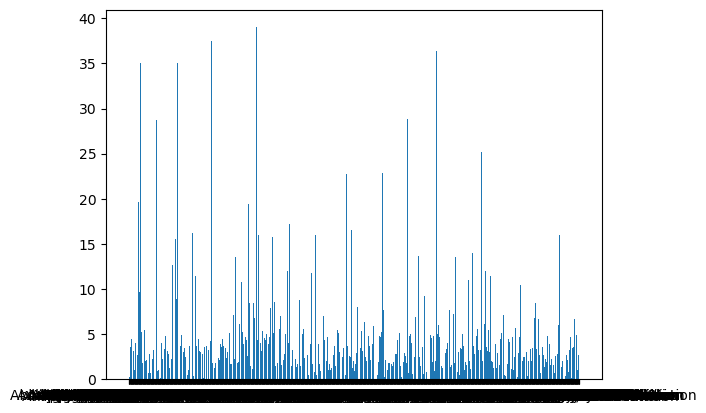

In [51]:
plt.bar(avg_time_difference['StationName'], avg_time_difference['delayed_departure_min'])
plt.show()

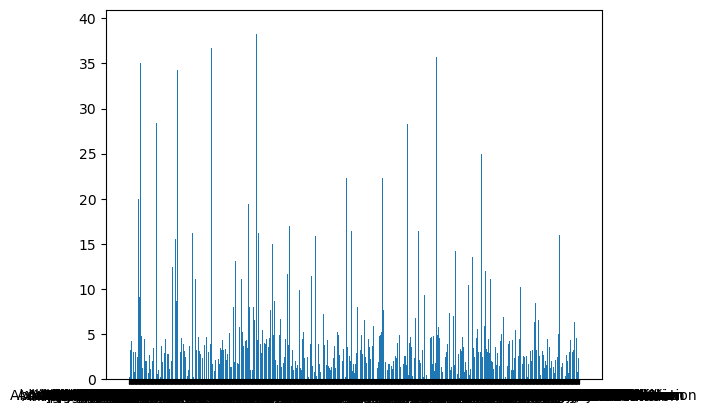

In [52]:
plt.bar(avg_time_difference_arrival['StationName'], avg_time_difference_arrival['delayed_arrival_min'])
plt.show()

In [53]:
print(avg_time_difference_arrival['delayed_arrival_min'].unique())

[ 5.16455696  3.6         0.25        4.046875    2.          3.23809524
  1.75       36.5         4.20526316  1.0625      1.55952381  2.69521411
  1.875       3.         26.47058824  0.84615385  0.80769231  1.375
  1.          5.27710843  5.125       5.75        2.46666667  0.61538462
  8.125      20.          1.54        1.125       9.16666667  3.38043478
 35.         17.66666667  6.2         4.8125      1.38888889  2.23469388
  1.2         4.3875      4.4         1.21621622  4.33908046  4.5
  5.5         2.25       12.5         8.          2.06666667 10.21518987
  1.46052632  4.70588235  0.66666667  4.39285714  4.12135922  2.70103093
  0.16666667  2.33333333  1.11111111  0.          3.28        1.85714286
  0.98755187  2.01587302  4.90878378  5.          3.45049505  7.
  1.12173913  2.44444444  2.27586207 10.5        28.37037037  2.48275862
  4.95348837  0.625       1.73758865  1.72222222  1.38202247  1.70103093
  0.5530303   2.52        3.73846154 12.          1.96296296  2.9682539

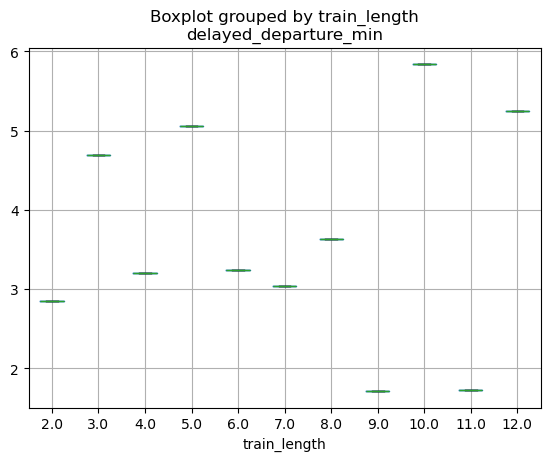

In [54]:
#create a box plot with train length and delayed_arrival_min
avg_time_diff.boxplot(column='delayed_departure_min', by='train_length', grid=True)
plt.show()

In [55]:
df['route_id'].value_counts()

202407077154583    177
202407067154611    167
202407097154226     99
202407068085393     85
202407087154294     79
                  ... 
202407078086974      1
202407077153472      1
202407077669460      1
202407078096001      1
202407078086842      1
Name: route_id, Length: 17575, dtype: int64

In [56]:
df.groupby('route_id')['is_delayed_arrival'].value_counts()

route_id         is_delayed_arrival
202407036700008  False                  1
202407036706303  False                  1
202407036706305  False                  1
202407036716226  False                  1
202407036732817  False                  2
                                       ..
202407098098669  False                  7
202407098320532  False                  1
202407098872408  True                  12
202407098872789  False                  1
202407098872790  False                  1
Name: is_delayed_arrival, Length: 17970, dtype: int64

In [57]:
delayed_df = df.groupby('unique_id')['is_delayed_arrival'].value_counts().reset_index(name='Count')
sorted_counts = delayed_df.sort_values(by='Count', ascending=False)

sorted_counts

,unique_id,is_delayed_arrival,Count
6560,G54611,False,167
6542,G54583,False,129
6302,G54259,False,119
5153,G49891,False,112
6345,G54341,False,103
...,...,...,...
8168,P85739,False,1
2708,G31157,False,1
10213,P95256,False,1
8166,P85736,False,1


In [58]:
df.groupby('StationName')['unique_id'].value_counts()

StationName                       unique_id
Abbey Wood (London) Rail Station  G54341       5
                                  P96286       5
                                  G54210       4
                                  G54259       4
                                  P95792       4
                                              ..
York Rail Station                 C48490       1
                                  C48573       1
                                  C48574       1
                                  C80043       1
                                  C80060       1
Name: unique_id, Length: 59948, dtype: int64

In [59]:
df.groupby('StationName')['is_delayed_arrival'].value_counts()

StationName                       is_delayed_arrival
Abbey Wood (London) Rail Station  False                 206
                                  True                   31
Accrington Rail Station           False                  18
                                  True                    2
Acle Rail Station                 False                   8
                                                       ... 
Yalding Rail Station              True                   14
Yarm Rail Station                 False                  42
                                  True                    2
York Rail Station                 False                 121
                                  True                   23
Name: is_delayed_arrival, Length: 2077, dtype: int64

In [60]:
df['is_completely_delayed'] = df['is_delayed_arrival'] & df['is_delayed_departure']
df['is_completely_delayed'].value_counts()

False    79945
True      7754
Name: is_completely_delayed, dtype: int64

In [61]:
df['is_delayed_arrival'].value_counts()

False    79945
True      7754
Name: is_delayed_arrival, dtype: int64

In [62]:
df['is_delayed_departure'].value_counts()

False    79943
True      7756
Name: is_delayed_departure, dtype: int64

In [63]:
#through searching both delayed columns we found out that exactly 5236 values were true for both delays and found out 1 train 
# had a delayed departure but not a delayed arrival showin
df[(df['is_delayed_departure'] == True) & (df['is_delayed_arrival'] == False)]

,route_id,unique_id,service_start_date,update_origin,train_platform,planned_time_arrival,planned_time_departure,actual_arrival_time,actual_departure_time,platform,...,Northing,Latitude,Longitude,actual_vs_planned_arrival,actual_vs_planned_departure,delayed_arrival_min,delayed_departure_min,Origin,Destination,is_completely_delayed
6211,202407047150858,G50858,2024-07-04,TD,ECROYDN,2024-07-04 22:18:00,2024-07-04 22:19:00,2024-07-04 22:18:00,2024-07-04 22:19:00,3,...,165770,51.375452,-0.092780,0 days,0 days 00:00:00,0.0,0.0,London Bridge Rail Station,Wivelsfield Rail Station,False
85917,202407097139226,G39226,2024-07-09,Darwin,PURLEY,2024-07-09 18:38:00,2024-07-09 18:45:00,2024-07-09 18:38:00,2024-07-09 18:49:00,5,...,161520,51.337577,-0.114035,0 days,0 days 00:04:00,0.0,4.0,Purley Rail Station,Norwood Junction Rail Station,False
